In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("games.csv")
df["Sales_million"] = df["Sales_million"].astype(float)


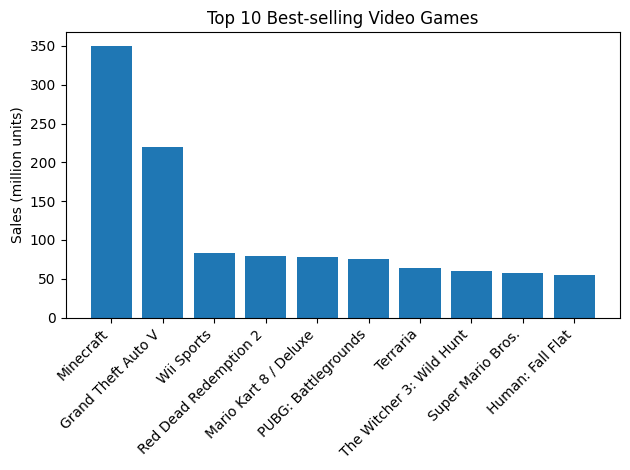

In [2]:
# KPI_1 Top 10 Game Sales Bar Chart

top10 = df.sort_values("Sales_million", ascending=False).head(10)

plt.figure()
plt.bar(top10["Title"], top10["Sales_million"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Sales (million units)")
plt.title("Top 10 Best-selling Video Games")
plt.tight_layout()
plt.show()


In [3]:
# KPI_2 Total Sales of whole games

total_sales = df["Sales_million"].sum()
print("Total sales (million):", total_sales)



Total sales (million): 2169.24


In [4]:
# KPI_3 Median sales of whole games

median_sales = df["Sales_million"].median()
print("Median sales (million):", median_sales)

Median sales (million): 34.5


In [5]:
# KPI_4 The sales percentage of the top 5 products in total sales 

top5_sales = df.sort_values("Sales_million", ascending=False).head(5)["Sales_million"].sum()
others_sales = total_sales - top5_sales
print(f"Top 5 share (%): {top5_sales / total_sales * 100:.2f}")


Top 5 share (%): 37.34


   Rank                  Title  Sales_million  share_pct
0     1              Minecraft         350.00  16.134683
1     2     Grand Theft Auto V         220.00  10.141801
2     3             Wii Sports          82.90   3.821615
3     4  Red Dead Redemption 2          79.00   3.641828
4     5  Mario Kart 8 / Deluxe          78.02   3.596651


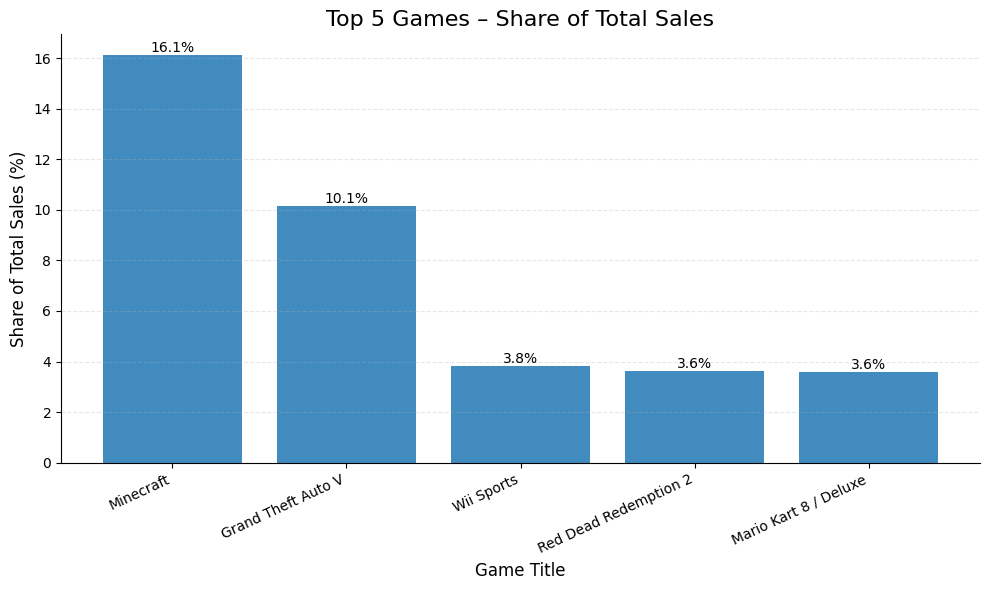

In [3]:
import matplotlib.pyplot as plt

# 1. Total sales
total_sales = df["Sales_million"].sum()

# 2. Top 5 games by sales
top5 = df.sort_values("Sales_million", ascending=False).head(5).copy()

# 3. Share of total sales for each of the top 5
top5["share_pct"] = top5["Sales_million"] / total_sales * 100

print(top5[["Rank", "Title", "Sales_million", "share_pct"]])

# 4. Plot a nice bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(top5["Title"], top5["share_pct"], alpha=0.85)

ax.set_title("Top 5 Games – Share of Total Sales", fontsize=16)
ax.set_xlabel("Game Title", fontsize=12)
ax.set_ylabel("Share of Total Sales (%)", fontsize=12)

# Rotate x labels so they don't overlap
plt.xticks(rotation=25, ha="right")

# Add percentage labels on top of each bar
for bar, pct in zip(bars, top5["share_pct"]):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{pct:.1f}%",
        ha="center",
        va="bottom",
        fontsize=10,
    )

# Make the chart a bit cleaner
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


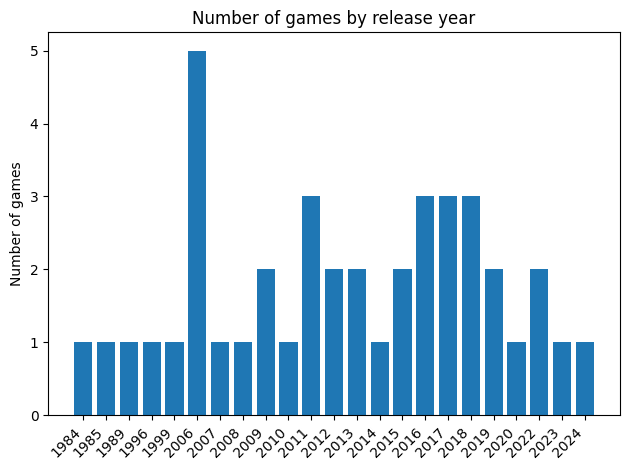

In [6]:
# KPI_5 Number of games by release year (bar chart)

year_counts = df["Year"].value_counts().sort_index()
x=year_counts.index.astype(int)

plt.figure()
plt.bar(x.astype(str), year_counts.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of games")
plt.title("Number of games by release year")
plt.tight_layout()
plt.show()


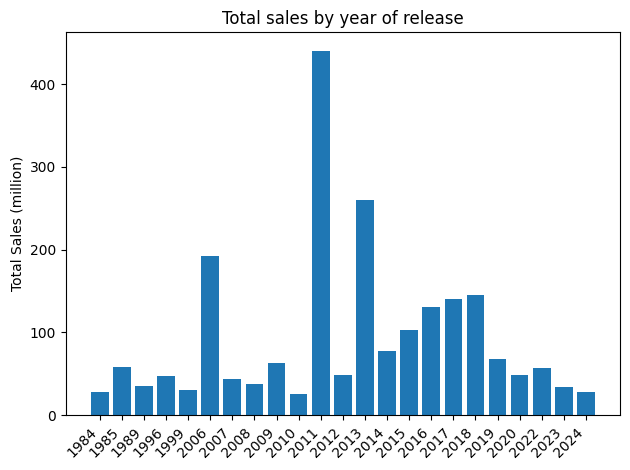

In [7]:
# KPI_6 Total sales by year of release (bar chart)

sales_by_year = df.groupby("Year")["Sales_million"].sum().sort_index()
x=year_counts.index.astype(int)

plt.figure()
plt.bar(x.astype(str), sales_by_year.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Total Sales (million)")
plt.title("Total sales by year of release")
plt.tight_layout()
plt.show()


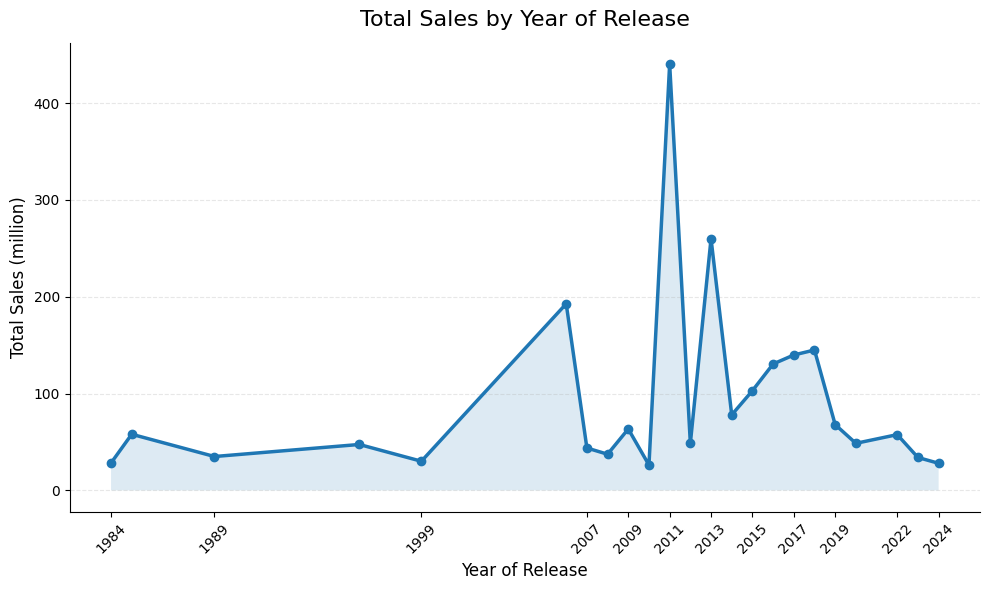

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Aggregate total sales by year (clean year if needed)
sales_by_year = (
    df.dropna(subset=["Year"])
      .assign(Year=lambda d: d["Year"].astype(int))
      .groupby("Year")["Sales_million"]
      .sum()
      .sort_index()
)

# X and Y
x = sales_by_year.index.astype(int)
y = sales_by_year.values

# Line chart
fig, ax = plt.subplots(figsize=(10, 6))

# Main line with markers
ax.plot(x, y, marker="o", linewidth=2.5)

# Light area under the curve
ax.fill_between(x, y, alpha=0.15)

ax.set_title("Total Sales by Year of Release", fontsize=16, pad=12)
ax.set_xlabel("Year of Release", fontsize=12)
ax.set_ylabel("Total Sales (million)", fontsize=12)

# If there are many years, show only some x-ticks to avoid clutter
if len(x) > 12:
    step = max(1, len(x) // 10)
    tick_positions = x[::step]
    ax.set_xticks(tick_positions)
else:
    ax.set_xticks(x)

ax.tick_params(axis="x", rotation=45)

# Make the chart cleaner
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


Sales_bin
0~20      0
20~40    25
40~60     9
60~80     5
80+       3
Name: count, dtype: int64


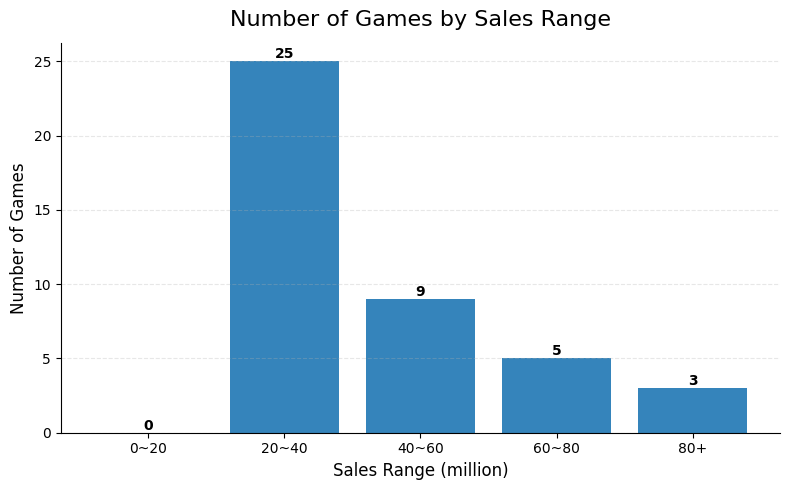

In [7]:
# KPI_7 Distribution by sales range

bins = [0, 20, 40, 60, 80, 1000]  
labels = ["0~20", "20~40", "40~60", "60~80", "80+"]
df["Sales_bin"] = pd.cut(df["Sales_million"], bins=bins, labels=labels, right=False)

bin_counts = df["Sales_bin"].value_counts().sort_index()
print(bin_counts)

# -------- 1) Bar chart: number of games per sales bin --------
fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.bar(bin_counts.index.astype(str), bin_counts.values, alpha=0.9)

ax.set_title("Number of Games by Sales Range", fontsize=16, pad=12)
ax.set_xlabel("Sales Range (million)", fontsize=12)
ax.set_ylabel("Number of Games", fontsize=12)

# Add value labels on top of bars
for bar, value in zip(bars, bin_counts.values):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        str(value),
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold"
    )

# Clean up style
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


In [9]:
# KPI_8 Sales by series

series_col = [c for c in df.columns if "Series" in c or "series" in c][0]

sales_by_series = (
    df.groupby(series_col)["Sales_million"]
      .sum()
      .sort_values(ascending=False)
)

print(sales_by_series.head(10))

Series
Minecraft           350.00
Grand Theft Auto    220.00
Wii                 187.86
Pokémon             183.22
Super Mario         173.31
Call of Duty        160.90
Mario Kart          115.40
Red Dead             79.00
PUBG Universe        75.00
The Witcher          60.00
Name: Sales_million, dtype: float64


             Series  Sales_million
0         Minecraft         350.00
1  Grand Theft Auto         220.00
2               Wii         187.86
3           Pokémon         183.22
4       Super Mario         173.31
5      Call of Duty         160.90
6        Mario Kart         115.40
7          Red Dead          79.00
8     PUBG Universe          75.00
9       The Witcher          60.00


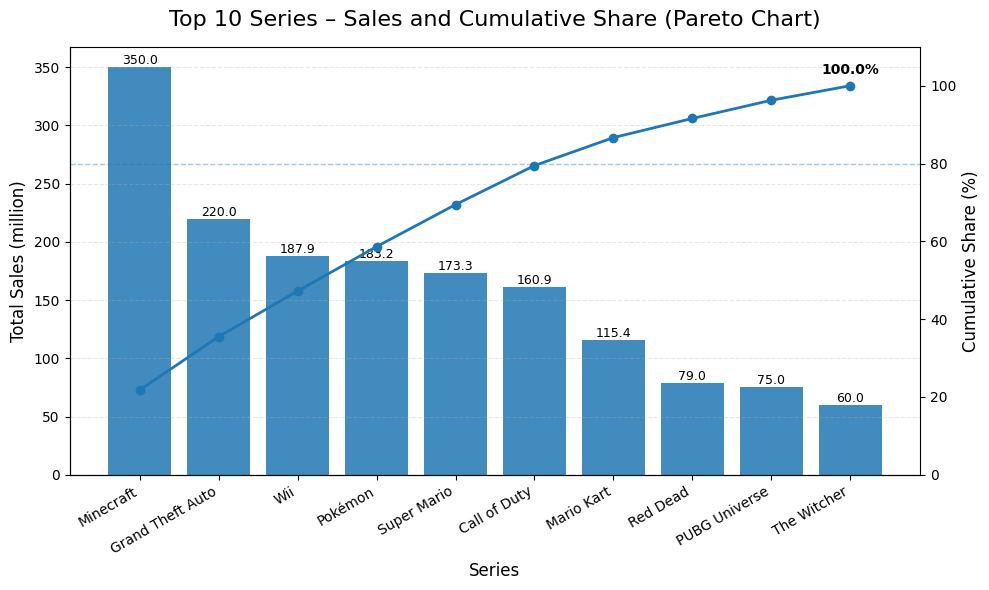

In [8]:
import matplotlib.pyplot as plt

series_col = [c for c in df.columns if "Series" in c or "series" in c][0]

sales_by_series = (
    df.groupby(series_col)["Sales_million"]
      .sum()
      .sort_values(ascending=False)
)

# Take top 10 series
top10 = sales_by_series.head(10).reset_index()
top10.columns = [series_col, "Sales_million"]

print(top10)

# Calculate cumulative sales and cumulative percentage (within top 10)
top10["cumulative_sales"] = top10["Sales_million"].cumsum()
total_top10_sales = top10["Sales_million"].sum()
top10["cumulative_pct"] = top10["cumulative_sales"] / total_top10_sales * 100

# ----- Pareto chart (bars + line, dual axis) -----
fig, ax1 = plt.subplots(figsize=(10, 6))

x = range(len(top10))

# Bar chart for sales
bars = ax1.bar(x, top10["Sales_million"], alpha=0.85)

ax1.set_title("Top 10 Series – Sales and Cumulative Share (Pareto Chart)", fontsize=16, pad=15)
ax1.set_xlabel("Series", fontsize=12)
ax1.set_ylabel("Total Sales (million)", fontsize=12)

ax1.set_xticks(x)
ax1.set_xticklabels(top10[series_col], rotation=30, ha="right")

# Add labels on top of bars
for bar, value in zip(bars, top10["Sales_million"]):
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{value:.1f}",
        ha="center",
        va="bottom",
        fontsize=9,
    )

# Make first axis cleaner
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.grid(axis="y", linestyle="--", alpha=0.3)

# Second y-axis for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(x, top10["cumulative_pct"], marker="o", linewidth=2)
ax2.set_ylabel("Cumulative Share (%)", fontsize=12)
ax2.set_ylim(0, 110)  # a bit above 100% for headroom

# Optional: horizontal reference line at 80%
ax2.axhline(80, linestyle="--", linewidth=1, alpha=0.4)

# Annotate last point with 100% label
last_x = x[-1]
last_pct = top10["cumulative_pct"].iloc[-1]
ax2.text(
    last_x,
    last_pct + 3,
    f"{last_pct:.1f}%",
    ha="center",
    fontsize=10,
    fontweight="bold",
)

plt.tight_layout()
plt.show()


Platform_type
Multi-platform     25
Single-platform    17
Name: count, dtype: int64


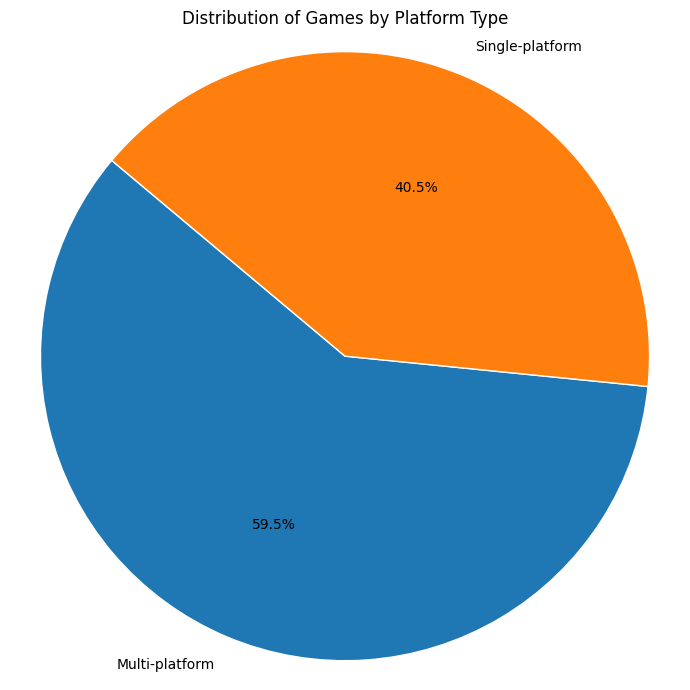

In [4]:
# KPI_9 Number of games released on single and multiple platforms

import re

platform_col = [c for c in df.columns if "Platform" in c or "platform" in c][0]

def platform_type(s):
    if pd.isna(s):
        return "Unknown"
    s = str(s).strip()
    if "Multi-platform" in s:
        return "Multi-platform"
    
    parts = re.split(r"[,/]", s)
    parts = [p.strip() for p in parts if p.strip()]

    return "Single-platform" if len(parts) == 1 else "Multi-platform"

df["Platform_type"] = df[platform_col].apply(platform_type)

type_counts = df["Platform_type"].value_counts()
print(type_counts)

labels = type_counts.index
sizes = type_counts.values

plt.figure(figsize=(7, 7))
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=140,
    wedgeprops={"edgecolor": "white"}
)
plt.title("Distribution of Games by Platform Type")
plt.axis("equal")  # Make the pie a circle
plt.tight_layout()
plt.show()


In [17]:
# KPI_10 Sales of the oldest and latest game

df_year_valid = df.dropna(subset=["Year"]).copy()
df_year_valid["Year"] = df_year_valid["Year"].astype(int)

oldest_game = df_year_valid.sort_values("Year").head(1)
newest_game = df_year_valid.sort_values("Year").tail(1)

print("The oldest game:")
print(oldest_game[["Title", "Year", "Sales_million"]])
print()
print("The latest gane:")
print(newest_game[["Title", "Year", "Sales_million"]])



The oldest game:
        Title  Year  Sales_million
29  Duck Hunt  1984           28.3

The latest gane:
                 Title  Year  Sales_million
31  Black Myth: Wukong  2024           28.0


The oldest game:
        Title  Year  Sales_million
29  Duck Hunt  1984           28.3

The latest game:
                 Title  Year  Sales_million
31  Black Myth: Wukong  2024           28.0


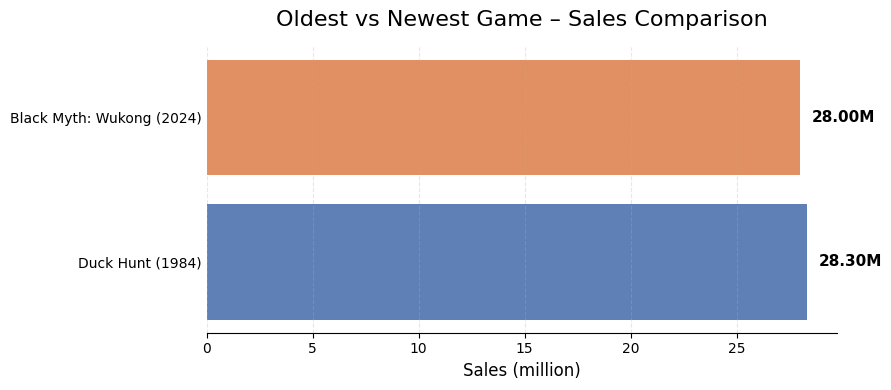

In [6]:
import matplotlib.pyplot as plt

# Drop rows without a valid year and convert Year to int
df_year_valid = df.dropna(subset=["Year"]).copy()
df_year_valid["Year"] = df_year_valid["Year"].astype(int)

# Find oldest and newest games
oldest_game = df_year_valid.sort_values("Year").head(1)
newest_game = df_year_valid.sort_values("Year").tail(1)

print("The oldest game:")
print(oldest_game[["Title", "Year", "Sales_million"]])
print()
print("The latest game:")
print(newest_game[["Title", "Year", "Sales_million"]])

# ----- Build a small DataFrame for plotting -----
old_new_df = (
    pd.concat([oldest_game, newest_game])
    .loc[:, ["Title", "Year", "Sales_million"]]
    .copy()
)

# Label like: "Game Name (1995)"
old_new_df["Label"] = old_new_df["Title"] + " (" + old_new_df["Year"].astype(str) + ")"

# Sort by year so oldest appears on top
old_new_df = old_new_df.sort_values("Year")

# ----- Nicer horizontal bar chart -----
fig, ax = plt.subplots(figsize=(9, 4))

colors = ["#4C72B0", "#DD8452"]  # one color for oldest, one for newest

bars = ax.barh(
    old_new_df["Label"],
    old_new_df["Sales_million"],
    color=colors,
    alpha=0.9
)

ax.set_title("Oldest vs Newest Game – Sales Comparison", fontsize=16, pad=15)
ax.set_xlabel("Sales (million)", fontsize=12)

# Remove y-axis label (labels already descriptive)
ax.set_ylabel("")

# Add value labels to the right of each bar
for bar, value in zip(bars, old_new_df["Sales_million"]):
    ax.text(
        bar.get_width() + max(old_new_df["Sales_million"]) * 0.02,  # a bit to the right of the bar
        bar.get_y() + bar.get_height() / 2,
        f"{value:.2f}M",
        va="center",
        ha="left",
        fontsize=11,
        fontweight="bold"
    )

# Make the chart cleaner
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.tick_params(axis="y", length=0)  # remove y-axis ticks
ax.grid(axis="x", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()
